In [305]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [306]:
train['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [307]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [308]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 

%matplotlib inline

In [309]:
train.shape

(10000, 12)

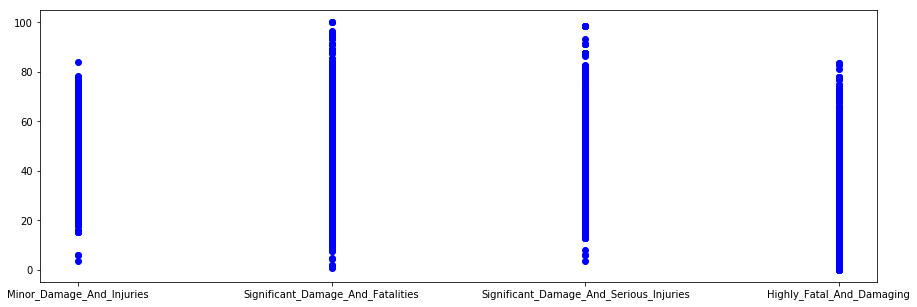

In [310]:
plt.figure(figsize=(15,5))
plt.plot(train['Severity'],train['Safety_Score'],'bo')
plt.show()

In [311]:
mapping = {'Minor_Damage_And_Injuries': 1, 'Significant_Damage_And_Fatalities': 2,
           'Significant_Damage_And_Serious_Injuries': 3,'Highly_Fatal_And_Damaging' : 4}
T=train.replace({'Severity': mapping})


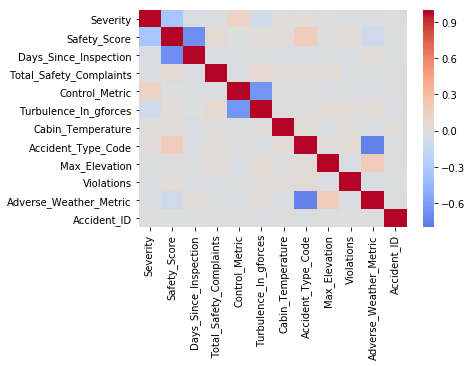

In [312]:
sns.heatmap(T.corr(), vmin=-0.8, vmax=1, center= 0,cmap= 'coolwarm')

In [313]:
U=T.drop(['Severity','Accident_ID'],axis=1)

In [314]:
y=T.Severity

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(U, y, test_size=0.25, random_state=0)

array([0.19186394, 0.16682963, 0.15301181, 0.10425106, 0.09996761,
       0.09870826, 0.09534569])

In [316]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [317]:
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [318]:
y_pred = knn.predict(X_test)

In [319]:
y_pred


array([3, 1, 3, ..., 4, 1, 3], dtype=int64)

In [320]:
confusion_matrix(y_test, y_pred)

array([[233,  51, 163, 180],
       [122,  61, 113, 121],
       [194,  45, 247, 216],
       [170,  58, 188, 338]], dtype=int64)

In [321]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.3516


In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [323]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, Y_pred))

0.5444


In [324]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print(accuracy_score(y_test, Y_pred))

0.3548


In [299]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
print(accuracy_score(y_test, Y_pred))

0.3768


In [325]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
print(accuracy_score(y_test, Y_pred))

0.2808


C:\Users\curaj\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [326]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
print(accuracy_score(y_test, Y_pred))


0.3084


In [327]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
print(accuracy_score(y_test, Y_pred))

0.2508


C:\Users\curaj\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [328]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
print(accuracy_score(y_test, Y_pred))

0.9164


In [329]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

print(accuracy_score(y_test, Y_pred))

0.926


In [330]:
TestT = test.drop('Accident_ID',axis=1)

In [331]:
Result = random_forest.predict(TestT)

In [332]:
R=pd.DataFrame(Result, columns=['Severity'])

In [333]:
mapping = {1 :'Minor_Damage_And_Injuries', 2: 'Significant_Damage_And_Fatalities',
           3: 'Significant_Damage_And_Serious_Injuries',4 :'Highly_Fatal_And_Damaging' }
Ans=R.replace({'Severity': mapping})


In [334]:
submission = pd.DataFrame({ 'Accident_ID': test.Accident_ID.values, 'Severity': Ans.Severity })
submission.to_csv("my_submission.csv", index=False)